In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps
cmap = cmaps.WhiteBlueGreenYellowRed

In [275]:
def draw_worldmap(data, vmin=0, vmax=0.1):
    projection = ccrs.PlateCarree(central_longitude=180)
    img_extent = (-180, 180, -90, 90)
    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    mat = ax.matshow(data,
                     origin='upper',
                     extent=img_extent,
                     transform=projection,
                     vmin=vmin, vmax=vmax,
                     cmap='WhiteBlueGreenYellowRed'
                    )
    cbar = fig.colorbar(mat,
                        ax=ax,
                        orientation='horizontal'
                       )
    plt.show()

In [277]:
def load_ndarray(filename='may_first_start_2017_2022_51ensembles',
                 ensembles=51,
                 days=215,
                 lats=181,
                 lons=360
                ):
    dr = '/work/common/precipitation/ECMWF_forecast/ndarray/'
    path = dr + filename + '.npy'
    forecast = np.load(path)
    print(f'forecast.shape: {forecast.shape}')
    return forecast

forecast.shape: (51, 6, 215, 181, 360)


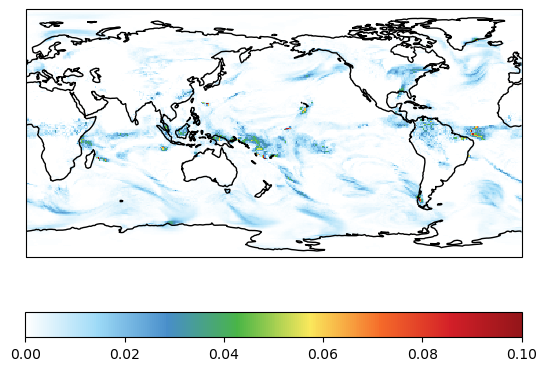

In [12]:
forecast = load_ndarray(filename='may_first_start_2017_2022_215days_51ensembles')

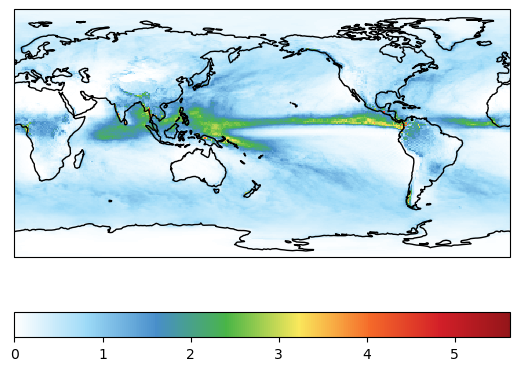

In [63]:
sample = forecast[0, 0, 214, :, :]
draw_worldmap(sample)

In [310]:
def save_specific_data(worldmap,
                       filename='may_first_start_2017_2022_7months_51ensembles',
                       save_flag=False,
                       ):
    """
    ensembles: 1993-2016=25 or 2017-2022=51
    years = 6
    months = 7
    lats = 181
    lons = 360
    """
    monthly = worldmap[:, :, 30::30, :, :]
    print(monthly.shape)
    
    if save_flag is False:
        print(f"save_flag is {save_flag}")
    else:
        dr = '/work/kajiyama/preprocessed/ECMWF_forecast/main'
        save_path = dr + filename + '.npy'
        np.save(save_path, monthly)
        print(f"{save_path} saved")
    return ens_arr

In [312]:
save_specific_data(forecast, 
                   filename='may_first_start_2017_2022_7months_51ensembles',
                   save_flag=True)

(51, 6, 7, 181, 360)
/work/kajiyama/data/ECMWF_forecast/may_first_start_2017_2022_7months_51ensembles.npy saved


array([[[[1.29907227, 1.95849609, 2.17285156, ..., 0.93273926,
          1.21191406, 1.33093262],
         [1.05004883, 1.46496582, 1.30200195, ..., 1.18493652,
          1.31018066, 1.14648438],
         [1.03149414, 1.22460938, 1.26538086, ..., 1.26928711,
          1.29040527, 1.31860352],
         ...,
         [1.53466797, 1.58447266, 1.68115234, ..., 1.86242676,
          2.22570801, 2.38391113],
         [1.60656738, 1.69555664, 1.84277344, ..., 1.9552002 ,
          2.08276367, 2.08190918],
         [1.68676758, 1.80456543, 2.02709961, ..., 2.01818848,
          2.02441406, 1.78186035]],

        [[1.5357666 , 2.69299316, 3.16271973, ..., 1.01196289,
          1.32641602, 1.51843262],
         [1.25683594, 1.58740234, 1.3515625 , ..., 1.21386719,
          1.35791016, 1.40551758],
         [1.34436035, 1.39172363, 1.39221191, ..., 1.65026855,
          1.50305176, 1.51660156],
         ...,
         [1.58276367, 1.68896484, 1.77575684, ..., 1.97375488,
          2.06604004, 2.1